In [22]:
# Import necessary libraries
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from tqdm import tqdm
import ultralytics
import os
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
import pandas as pd
import cv2
from IPython.display import Image
from ultralytics import YOLO
import pickle

ultralytics.checks()


Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Core(TM) i7-10510U 1.80GHz)
Setup complete ✅ (8 CPUs, 15.4 GB RAM, 524.8/620.0 GB disk)


In [36]:
def render(image):
    if image.dtype == np.float64:
        image = cv2.convertScaleAbs(image)
    if len(image.shape) == 3 and image.shape[2] == 3: # BGR or RGB
        if np.array_equal(image[:, :, 0], image[:, :, 2]):
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_bytes = cv2.imencode('.png', image)[1].tobytes()
    display(Image(data=img_bytes))
    
    
def run_yolo(yolo, image_url, conf=0.25, iou=0.7):
    results = yolo(image_url, conf=conf, iou=iou, verbose=False)
    res = results[0].plot()[:, :, [2,1,0]]
    res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
    bounding_boxes = results
    return res, bounding_boxes

In [24]:
test_image = 'datasets/images/valid/4_1.jpg'

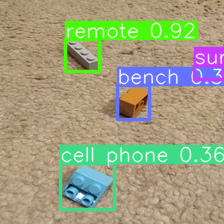

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant'

In [35]:
yolo = YOLO('yolov8s.pt')
img, bbs = run_yolo(yolo, test_image)
render(img)
print(bbs)

In [ ]:
# train the model
# yolo.train(data='yolo_config.yaml', epochs=1)

# validate the model
# valid_results = yolo.val()

In [ ]:
# save the model
# yolo.save('best.pt')

# yolo =  YOLO(load_model="best.pt")


# with open('yolo.pkl', 'wb') as f:
#    pickle.dump(yolo, f)
    
# load the model with pickle
# with open('yolo.pkl', 'rb') as f:
    # yolo = pickle.load(f)

In [ ]:
# load the best model
# yolo = yolo.load('runs/detect/train2/weights/best.pt')

# test the model on an image
# render(run_yolo(yolo, test_image))